In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from natsort import natsorted
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
import os, sys

Concatenate genotyped cells list, 'Cells_Genotyped_Complete_Well_x.csv', from every well into a single complete genotyped cell list

In [2]:
path = 'genotyping_results'
well_dirs = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

for well in tqdm(well_dirs):
    i = int(well.split('_')[-1])
    
    path_csv = join('genotyping_results', 'well_' + str(i), 'Cells_Genotyped_Complete_Well_' + str(i) + '.csv')

    df_temp = pd.read_csv(path_csv)
    df_temp['well'] = i*np.ones([len(df_temp)])
    
    if i == 1:
        df_concat = df_temp.copy()
        
    if i > 1:
        df_concat = pd.concat((df_concat, df_temp))

# df_concat.to_csv('Cells_Genotyped.csv', index=False)
print(df_concat.shape)

100%|██████████| 1/1 [00:00<00:00, 36.25it/s]

(3167, 13)


Concatenate phenotyped cells batches from directory, then remove cells genotyped but not phenotyped

In [5]:
path = 'phenotyping_results'
files = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.csv')]

for i, file in tqdm(enumerate(files)):
    
    path_csv = join(path, file)
    df_temp = pd.read_csv(path_csv)
    
    if i == 0:
        df_concat = df_temp.copy()
        
    if i > 0:
        df_concat = pd.concat((df_concat, df_temp))

try:
    df_new = df_new.drop(columns=['Unnamed: 0'])
except:
    print('No Unnamed columns')

# Omitted cells not phenotyped
df = df_concat.copy()
n_0 = len(df)
df_new = df[df['area_nuc'] != -1]
n_1 = len(df_new)

print('Original cells:', n_0, '\nCells omitted:', n_0 - n_1, '\nFraction of retained cells:', n_1/n_0)

# df_new.to_csv('Cells_Phenotyped.csv', index=False)
print('done')

31it [00:00, 417.42it/s]

Original cells: 3067 
Cells omitted: 685 
Fraction of retained cells: 0.7766547114444082
done


Concatenate single-cell iamge atches from directory, then remove cells phenotyped but an image was not produced successfully

In [4]:
path = 'datasets/single_cell_dataframes'
files = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.csv')]

for i, file in tqdm(enumerate(files)):
    
    path_csv = join(path, file)
    df_temp = pd.read_csv(path_csv)
    
    if i == 0:
        df_concat = df_temp.copy()
        
    if i > 0:
        df_concat = pd.concat((df_concat, df_temp))

try:
    df_new = df_new.drop(columns=['Unnamed: 0'])
except:
    print('No Unnamed columns')

# Omitted cells not phenotyped
df = df_concat.copy()
n_0 = len(df)
df_new = df[df['image'] != '-1']
n_1 = len(df_new)

print('Original cells:', n_0, '\nCells omitted:', n_0 - n_1, '\nFraction of retained cells:', n_1/n_0)

df_new.to_csv('Cells_Imaged.csv', index=False)
print('done')

24it [00:00, 380.88it/s]

Original cells: 2382 
Cells omitted: 53 
Fraction of retained cells: 0.9777497900923594
done


QC single cell image

(2382, 33)
RPL23A_2_4_34_W-1_T-35_C-513.png


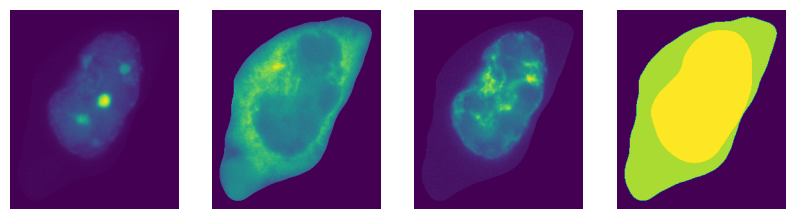

In [11]:
df_i = pd.read_csv('Cells_Imaged.csv')
print(df_i.shape)

img_path = df_i['image'].iloc[100]

print(img_path)

img = np.array(Image.open('datasets/single_cells/' + img_path))

cell_mask = img[:, :, -1] > 150
nuc_mask = img[:, :, -1] > 200

plt.figure(figsize=(10, 6))

for ch in range(4):
    plt.subplot(1, 4, ch + 1)
    plt.imshow(img[:, :, ch]*cell_mask)
    plt.axis('off')
    
plt.show()